In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('PM_Carbon_Database_for_Release_2023_V2.xlsx', skiprows=1)

In [3]:
df

,Project Ref\nCalculation Year,Unnamed: 1,Calculation Design Stage,Location,GIFA (Total),Project Value (£m),Value Type,Project Sector,Type,Storeys (#),...,Reinforcement Total Carbon (A1-A5) (kgCO2e),Reinforcement % Carbon (A1-A5),Steel (Other) Total Carbon (A1-A5) (kgCO2e),Steel (Other) % Carbon (A1- A5),Steel (Sections) Total Carbon (A1-A5) (kgCO2e),Steel (Sections) % Carbon (A1-A5),Timber (Plain) Total Carbon (A1-A5) (kgCO2e),Timber (Plain) % Carbon (A1- A5),Timber (Products) Total Carbon (A1-A5) (kgCO2e),Timber (Products) % Carbon (A1-A5)
0,1,2022,As-Built,SE8,75,0.2,Whole Building,Residential (Single),New Build (Brownfield),1,...,1643,0.10,0,0.0,0,0.00,0,0.00,6985,0.44
1,2,2020,As-Built,SE22,4631,17.0,Whole Building,Healthcare,New Build (Brownfield),3,...,487639,0.35,0,0.0,21316,0.02,0,0.00,0,0.00
2,3,2020,As-Built,SW10,4640,10.0,Whole Building,Residential (Multi),New Build (Brownfield),7,...,251770,0.24,0,0.0,73259,0.07,0,0.00,333170,0.32
3,4,2020,As-Built,SW19,742,3.7,Whole Building,Cultural/Public,Mixed New Build/Refurb,2,...,8132,0.05,0,0.0,59902,0.34,14758,0.08,0,0.00
4,5,2020,As-Built,SN8,1534,9.0,Whole Building,Residential (Single),New Build (Greenfield),2,...,149177,0.25,0,0.0,20692,0.03,7705,0.01,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,399,2022,Stage 2,SO15,9632,30.0,Whole Building,Residential (Multi),New Build (Brownfield),7,...,766606,0.39,0,0.0,20869,0.01,1475,0.00,0,0.00
399,400,2022,Stage 3,CR2,504,2.0,Whole Building,Mixed Use,New Build (Greenfield),1,...,47333,0.31,0,0.0,24828,0.16,0,0.00,0,0.00
400,401,2022,Stage 3,KT11,2155,4.0,Whole Building,Residential (Single),New Build (Brownfield),3,...,62716,0.13,0,0.0,25889,0.06,21000,0.04,8698,0.02
401,402,2022,Stage 3,SW15,623,0.9,Whole Building,Educational,Mixed New Build/Refurb,2,...,7059,0.09,0,0.0,18818,0.23,937,0.01,2064,0.03


In [4]:
df.columns

Index(['Project Ref\nCalculation Year', 'Unnamed: 1',
       'Calculation Design Stage', 'Location', 'GIFA (Total)',
       'Project Value (£m)', 'Value Type', 'Project Sector', 'Type',
       'Storeys (#)', 'Passivhaus?', 'Basement?', 'Foundation Type',
       'Ground Floor Type', 'Superstructure Type', 'Cladding Type',
       'Fire Rating', 'Carbon A1-A3 (kgCO2e)', 'Sequestration A1-A3 (kgCO2e)',
       'Carbon A4 (kgCO2e)', 'Carbon A5a (kgCO2e)', 'Carbon A5w (kgCO2e)',
       'Carbon Total A1-A5 (kgCO2e)', 'Carbon B1 (kgCO2e)',
       'Carbon C1 (kgCO2e)', 'Carbon C2 (kgCO2e)', 'Carbon C3-C4 (kgCO2e)',
       'Carbon Total A1-C4 (kgCO2e)', 'Carbon D (kgCO2e)',
       'Carbon Total A1-D (kgCO2e)', 'A1-A3 Rate (kgCO2e/m2)',
       'A1-A5 Rate (kgCO2e/m2)', 'A1-C4 Rate (kgCO2e/m2)',
       'A1-D Rate (kgCO2e/m2)', 'SCORS Rating', 'Construction Carbon (kgCO2e)',
       'Construction % Carbon (A1- A5)',
       'Concrete Total Carbon (A1- A5) (kgCO2e)', 'Concrete % Carbon (A1-A5)',
      

In [5]:
features = ['Calculation Design Stage', 'GIFA (Total)',
      'Type',
       'Storeys (#)', 'Basement?', 'Foundation Type',
       'Ground Floor Type', 'Superstructure Type', 'Cladding Type',
       'Fire Rating', 'Carbon A1-A3 (kgCO2e)'
       ]
cat_features = ['Calculation Design Stage', 
        'Type',
      'Basement?', 'Foundation Type',
       'Ground Floor Type', 'Superstructure Type', 'Cladding Type',
       'Fire Rating', 
       ]
num_features = [
            # 'GIFA (Total)',
                 'Storeys (#)',
                 'GIFA per Storey'
               ]
quantity_cols = [
    
]
target = ['Carbon A1-A3 (kgCO2e)_log']
df = df[features]
df

,Calculation Design Stage,GIFA (Total),Type,Storeys (#),Basement?,Foundation Type,Ground Floor Type,Superstructure Type,Cladding Type,Fire Rating,Carbon A1-A3 (kgCO2e)
0,As-Built,75,New Build (Brownfield),1,NaN,Raft,Raft,Timber Frame (Glulam/CLT),Lightweight Only,90,11737.9
1,As-Built,4631,New Build (Brownfield),3,NaN,Piled Ground Beams,Suspended RC,Concrete (In-Situ),Masonry/SFS,60,1164255.3
2,As-Built,4640,New Build (Brownfield),7,NaN,Mass Pads/Strips,Suspended RC,Timber Frame (Glulam/CLT),Lightweight Only,60,820343.3
3,As-Built,742,Mixed New Build/Refurb,2,NaN,Reinforced Pads/Strips,Ground Bearing RC,Steel Frame/Precast,Masonry/SFS,60,131643.5
4,As-Built,1534,New Build (Greenfield),2,Partial Footprint,Raft,Suspended RC,Masonry/Concrete,Masonry/Stone,60,458584.9
...,...,...,...,...,...,...,...,...,...,...,...
398,Stage 2,9632,New Build (Brownfield),7,NaN,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Lightweight/SFS,90,1629756.7
399,Stage 3,504,New Build (Greenfield),1,NaN,Reinforced Pads/Strips,Suspended RC,Steel Frame/Other,Lightweight Only,60,127896.8
400,Stage 3,2155,New Build (Brownfield),3,NaN,Piled Ground Beams,Suspended RC,Masonry/Concrete,Masonry/Stone,90,367540.6
401,Stage 3,623,Mixed New Build/Refurb,2,NaN,Piled Ground Beams,Suspended Precast,Steel Frame/Timber,Masonry/Stone,90,59187.4


In [6]:
for feat in features:
    if feat == 'Carbon A1-A3 (kgCO2e)':
        print(max(df['Carbon A1-A3 (kgCO2e)']), min(df['Carbon A1-A3 (kgCO2e)']))
        continue
    print(feat,df[feat].unique())

Calculation Design Stage ['As-Built' 'Stage 4' 'Stage 3' 'Stage 5' 'Stage 2']
GIFA (Total) [   75  4631  4640   742  1534  7284  4180 15145  4500  3900  1724  2772
   904  1050  1555 26834  8118  1874  2349   686  7755  2100 15985 11939
  5705  3460 11500  9483 38439  2276  2160   220  1311 11736  7922   544
  4115  5620  1712 35198 14029  1730  2139  1074  3156  4700  1360  1024
  6267  1154   862  2120  3499 10108  9862  1290  1513  1752  5428   125
 19512   398  2395 10220  5500 20000  1729  1850  2054   427  7970  1210
  2769 17710  3600   763  2400   810   648  1100   500  1900   900  1200
   300  1853  1135  3023   867   147   756  3268 21500  1582    45 43706
  1760   585 12665  8500  1862 12577   109   312  3657  1830  4160  2800
  1658  3516   517  1975  1643  6941   189   825  1620   800   470  2368
   767  2404   306  1930  8748  1163  2350  2575   456 12184  4787  8897
  3851   374   307  1072  1137   340   446   587 17240  6975  2475   950
  3960  3950  4620  4950  2490   

In [7]:
# print(len(df[df['Carbon A1-A3 (kgCO2e)'] > 15000000]))

# df = df[df['Carbon A1-A3 (kgCO2e)'] < 6000000]
df['Carbon A1-A3 (kgCO2e)_log'] = np.log(df['Carbon A1-A3 (kgCO2e)'])

df['Carbon_Intensity'] = df['Carbon A1-A3 (kgCO2e)'] / df['GIFA (Total)']
df['GIFA per Storey'] = df['GIFA (Total)'] / df['Storeys (#)']
df['Fire Rating'] = df['Fire Rating'].replace('Other', 0)
df['Basement?']  = df['Basement?'].fillna('none')
# df['Basement?'] = df['Basement?'].replace(', 'None')
df


C:\Users\dczqd\AppData\Local\Temp\ipykernel_5424\2742839312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Carbon A1-A3 (kgCO2e)_log'] = np.log(df['Carbon A1-A3 (kgCO2e)'])
C:\Users\dczqd\AppData\Local\Temp\ipykernel_5424\2742839312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Carbon_Intensity'] = df['Carbon A1-A3 (kgCO2e)'] / df['GIFA (Total)']
C:\Users\dczqd\AppData\Local\Temp\ipykernel_5424\2742839312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Calculation Design Stage,GIFA (Total),Type,Storeys (#),Basement?,Foundation Type,Ground Floor Type,Superstructure Type,Cladding Type,Fire Rating,Carbon A1-A3 (kgCO2e),Carbon A1-A3 (kgCO2e)_log,Carbon_Intensity,GIFA per Storey
0,As-Built,75,New Build (Brownfield),1,none,Raft,Raft,Timber Frame (Glulam/CLT),Lightweight Only,90,11737.9,9.370578,156.505333,75.000000
1,As-Built,4631,New Build (Brownfield),3,none,Piled Ground Beams,Suspended RC,Concrete (In-Situ),Masonry/SFS,60,1164255.3,13.967592,251.404729,1543.666667
2,As-Built,4640,New Build (Brownfield),7,none,Mass Pads/Strips,Suspended RC,Timber Frame (Glulam/CLT),Lightweight Only,60,820343.3,13.617478,176.798125,662.857143
3,As-Built,742,Mixed New Build/Refurb,2,none,Reinforced Pads/Strips,Ground Bearing RC,Steel Frame/Precast,Masonry/SFS,60,131643.5,11.787853,177.417116,371.000000
4,As-Built,1534,New Build (Greenfield),2,Partial Footprint,Raft,Suspended RC,Masonry/Concrete,Masonry/Stone,60,458584.9,13.035901,298.947132,767.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Stage 2,9632,New Build (Brownfield),7,none,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Lightweight/SFS,90,1629756.7,14.303941,169.202315,1376.000000
399,Stage 3,504,New Build (Greenfield),1,none,Reinforced Pads/Strips,Suspended RC,Steel Frame/Other,Lightweight Only,60,127896.8,11.758979,253.763492,504.000000
400,Stage 3,2155,New Build (Brownfield),3,none,Piled Ground Beams,Suspended RC,Masonry/Concrete,Masonry/Stone,90,367540.6,12.814589,170.552483,718.333333
401,Stage 3,623,Mixed New Build/Refurb,2,none,Piled Ground Beams,Suspended Precast,Steel Frame/Timber,Masonry/Stone,90,59187.4,10.988464,95.003852,311.500000


In [8]:
df_highcarbon = df[df['Carbon A1-A3 (kgCO2e)'] > 6000000]
print(max(df_highcarbon.count())/max(df.count()) *100)

df_highcarbon

3.970223325062035


,Calculation Design Stage,GIFA (Total),Type,Storeys (#),Basement?,Foundation Type,Ground Floor Type,Superstructure Type,Cladding Type,Fire Rating,Carbon A1-A3 (kgCO2e),Carbon A1-A3 (kgCO2e)_log,Carbon_Intensity,GIFA per Storey
15,As-Built,26834,New Build (Brownfield),24,Partial Footprint,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Precast/GRC,120,7546139.9,15.836547,281.215618,1118.083333
28,As-Built,38439,New Build (Brownfield),20,Extended Footprint,Piles (Pile Caps),Suspended RC,Concrete (Precast),Masonry/SFS,120,11778873.0,16.281818,306.430266,1921.950000
39,As-Built,35198,New Build (Brownfield),17,Full Footprint,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Masonry/SFS,120,11141073.0,16.226149,316.525740,2070.470588
73,Stage 2,17710,New Build (Brownfield),8,Partial Footprint,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Masonry/Stone,90,6586432.4,15.700522,371.904709,2213.750000
97,As-Built,43706,New Build (Brownfield),21,none,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Masonry/SFS,120,8908382.7,16.002503,203.825166,2081.238095
161,Stage 2,56828,New Build (Brownfield),18,none,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Masonry/SFS,120,17775237.0,16.693317,312.790121,3157.111111
162,Stage 3,19730,New Build (Brownfield),14,none,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Masonry/SFS,90,6379500.2,15.668600,323.340101,1409.285714
197,Stage 3,18228,New Build (Brownfield),13,Partial Footprint,Raft,Suspended RC,Concrete (In-Situ),Masonry Only,90,6141622.0,15.630599,336.933399,1402.153846
210,Stage 2,35392,New Build (Brownfield),9,Partial Footprint,Piles (Pile Caps),Suspended RC,Steel Frame/Other,Masonry/SFS,120,8629910.8,15.970745,243.837896,3932.444444
213,Stage 2,19310,New Build (Brownfield),12,none,Piles (Pile Caps),Suspended RC,Concrete (In-Situ),Masonry/SFS,90,7110721.5,15.777114,368.240368,1609.166667


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



def basic_stats(df):
    """Calculate and print basic statistics"""
    print("\n=== Basic Statistics ===")
    print("\nNumerical Columns Summary:")
    print(df[['GIFA (Total)',  'Storeys (#)', 'Carbon A1-A3 (kgCO2e)']].describe())
    
    print("\nMissing Values:")
    print(df.isnull().sum())

def project_type_analysis(df):
    """Analyze project types distribution"""
    plt.figure(figsize=(12, 6))
    project_counts = df['Project Sector'].value_counts()
    project_counts.plot(kind='bar')
    plt.title('Distribution of Project Sectors')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n=== Superstructure Types Distribution ===")
    print(project_counts)
    plt.figure(figsize=(12, 6))
    project_counts = df['Superstructure Types'].value_counts()
    project_counts.plot(kind='bar')
    plt.title('Distribution of Superstructure Types')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    


def building_characteristics(df):
    """Analyze building characteristics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Storeys distribution
    sns.histplot(data=df, x='Storeys (#)', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Building Heights')

    
    # Foundation types
    foundation_counts = df['Foundation Type'].value_counts()
    foundation_counts.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Foundation Types')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Fire ratings
    df['Fire Rating'].value_counts().plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
    axes[1,0].set_title('Fire Rating Distribution')
    

    plt.tight_layout()
    plt.show()

def size_value_analysis(df):
    """Analyze relationship between size and value"""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='GIFA (Total)', y='Carbon A1-A3 (kgCO2e)')
    plt.title('Carbon A1-A3 (kgCO2e) vs GIFA')
    plt.xlabel('GIFA (Total)')
    plt.ylabel('Carbon A1-A3 (kgCO2e)')
    
    # Calculate correlation
    correlation = df['GIFA (Total)'].corr(df['Carbon A1-A3 (kgCO2e)'])
    print(f"\nCorrelation between GIFA and Carbon A1-A3 (kgCO2e): {correlation:.2f}")
    correlation = df['Storeys (#)'].corr(df['Carbon A1-A3 (kgCO2e)'])
    print(f"\nCorrelation between Storeys (#) and Carbon A1-A3 (kgCO2e): {correlation:.2f}")
    
    plt.show()

def sustainability_analysis(df):
    """Analyze sustainability aspects"""
  
    # Carbon analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cladding Type', y='Carbon A1-A3 (kgCO2e)', data=df)
    plt.xticks(rotation=45)
    plt.title('Carbon A1-A3 (kgCO2e) by Cladding Type')
    plt.tight_layout()
    plt.show()
        # Carbon analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Superstructure Type', y='Carbon A1-A3 (kgCO2e)', data=df)
    plt.xticks(rotation=45)
    plt.title('Carbon A1-A3 (kgCO2e) by Superstructure Type')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Storeys (#)', y='Carbon A1-A3 (kgCO2e)', data=df)
    plt.xticks(rotation=45)
    plt.title('Carbon A1-A3 (kgCO2e) by Storeys (#)')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Calculation Design Stage', y='Carbon A1-A3 (kgCO2e)', data=df)
    plt.xticks(rotation=45)
    plt.title('Carbon A1-A3 (kgCO2e) by Calculation Design Stage')
    plt.tight_layout()
    plt.show()

    sns.boxplot(x='Type', y='Carbon A1-A3 (kgCO2e)', data=df)
    plt.xticks(rotation=45)
    plt.title('Carbon A1-A3 (kgCO2e) by Type')
    plt.tight_layout()
    plt.show()
def construction_methods_analysis(df):
    """Analyze construction methods"""
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Cladding types
    df['Cladding Type'].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title('Distribution of Cladding Types')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Ground floor types
    df['Ground Floor Type'].value_counts().plot(kind='bar', ax=axes[1])
    axes[1].set_title('Distribution of Ground Floor Types')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def main():
    """Main analysis function"""
    # Set style for all plots
    
    # Perform all analyses
    basic_stats(df)
    # project_type_analysis(df)
    building_characteristics(df)
    size_value_analysis(df)
    sustainability_analysis(df)
    construction_methods_analysis(df)
    sns.histplot(data=df, x='Carbon A1-A3 (kgCO2e)')
    
    plt.figure(figsize=(12, 6))
    project_counts = df['Calculation Design Stage'].value_counts()
    project_counts.plot(kind='bar')
    plt.title('Distribution of Calculation Design Stage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



=== Basic Statistics ===

Numerical Columns Summary:
       GIFA (Total)  Storeys (#)  Carbon A1-A3 (kgCO2e)
count    403.000000   403.000000           4.030000e+02
mean    3921.133995     4.325062           1.082498e+06
std     6874.387971     3.959502           2.010162e+06
min       21.000000     1.000000           2.386700e+03
25%      461.500000     2.000000           9.211475e+04
50%     1501.000000     3.000000           3.718801e+05
75%     4027.500000     5.000000           1.054192e+06
max    56828.000000    25.000000           1.777524e+07

Missing Values:
Calculation Design Stage     0
GIFA (Total)                 0
Type                         0
Storeys (#)                  0
Basement?                    0
Foundation Type              0
Ground Floor Type            0
Superstructure Type          0
Cladding Type                0
Fire Rating                  0
Carbon A1-A3 (kgCO2e)        0
Carbon A1-A3 (kgCO2e)_log    0
Carbon_Intensity             0
GIFA per Storey       

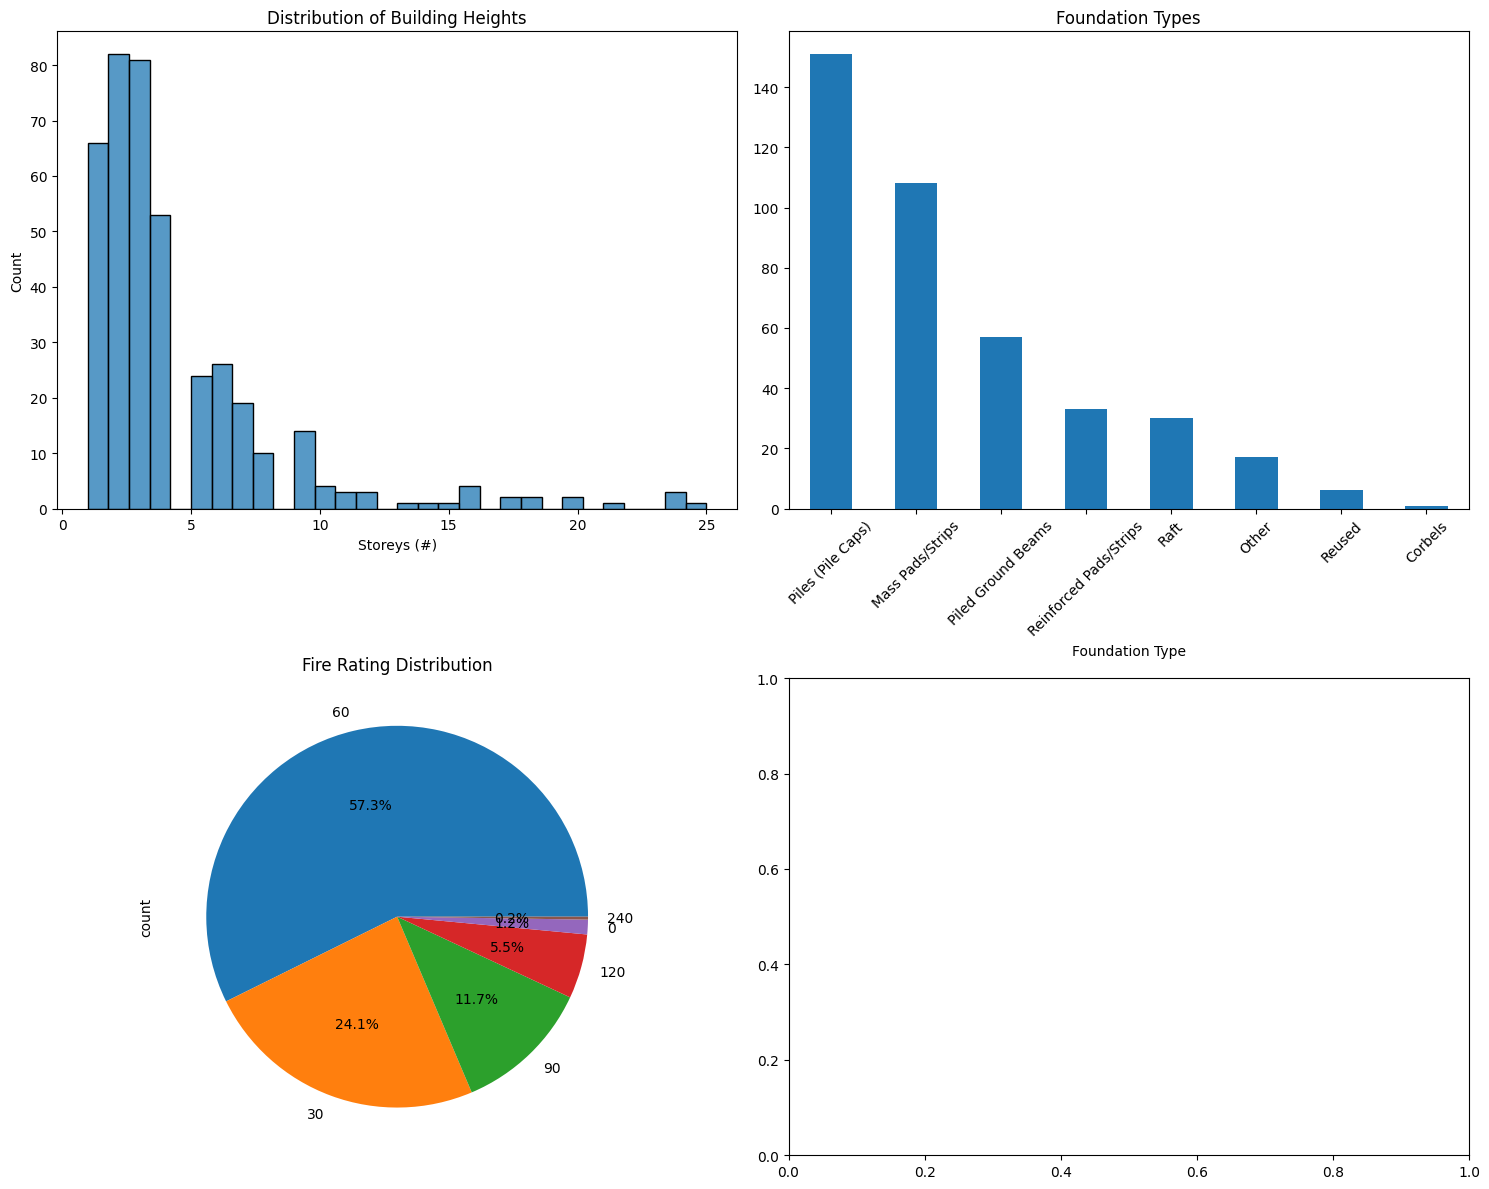


Correlation between GIFA and Carbon A1-A3 (kgCO2e): 0.97

Correlation between Storeys (#) and Carbon A1-A3 (kgCO2e): 0.71


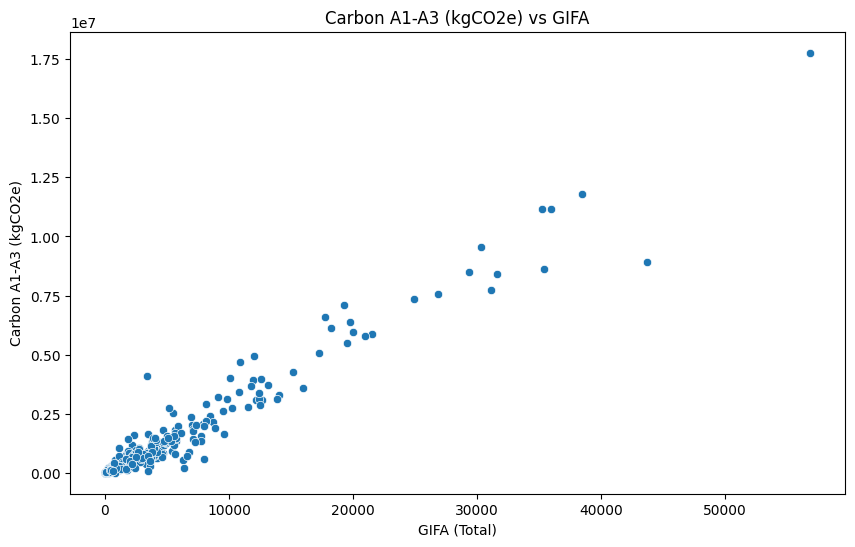

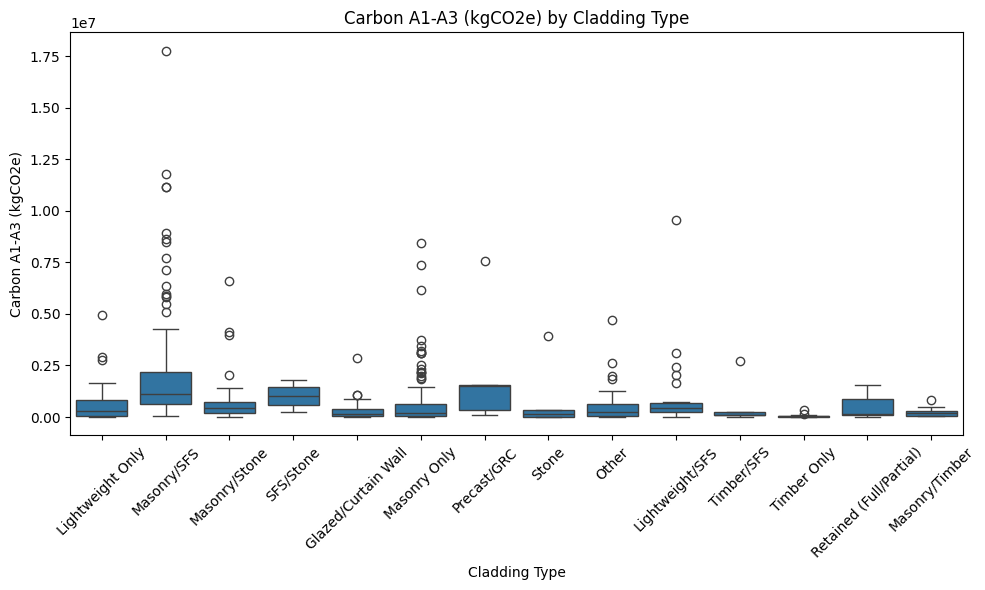

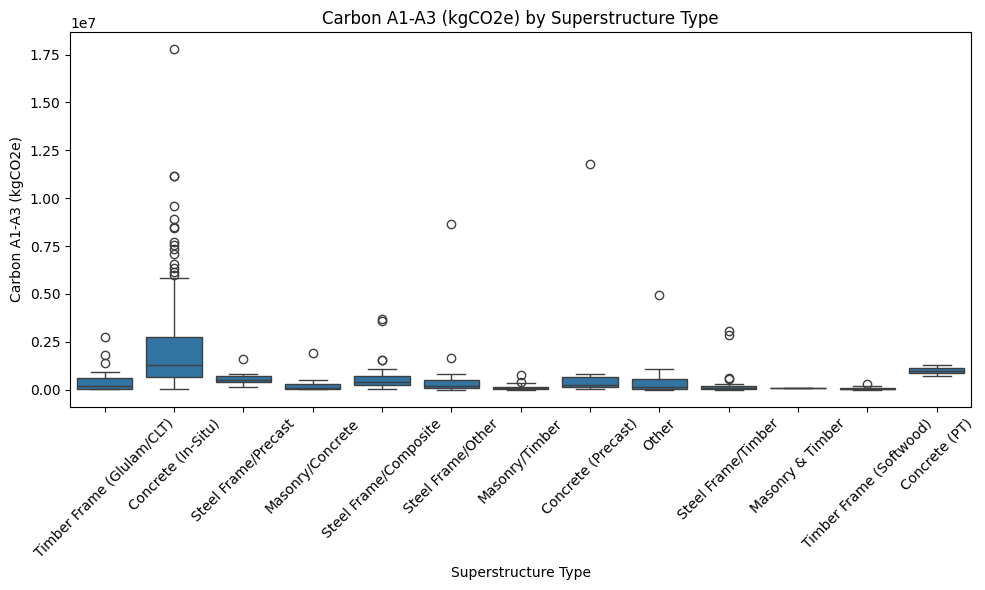

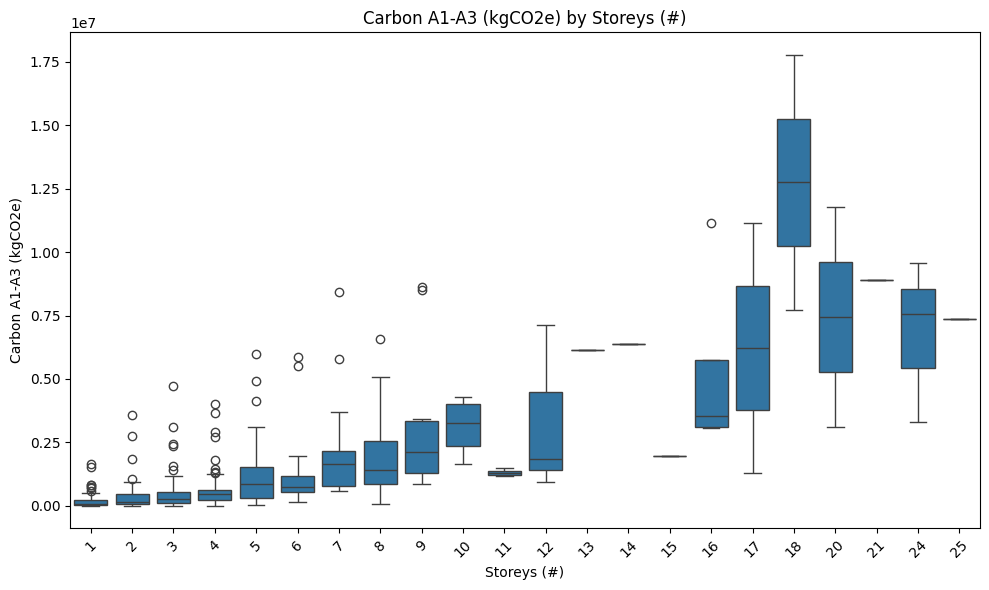

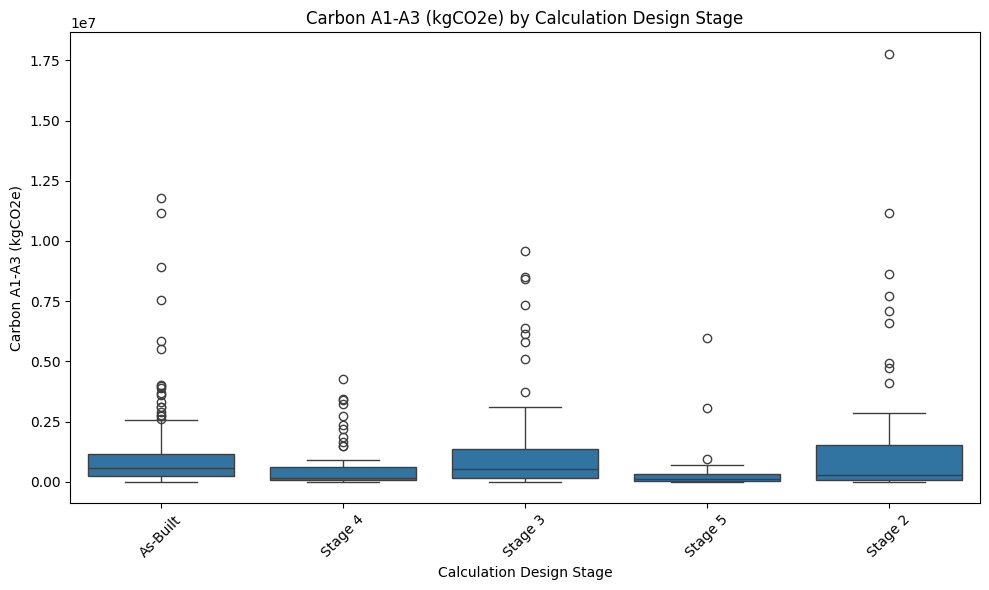

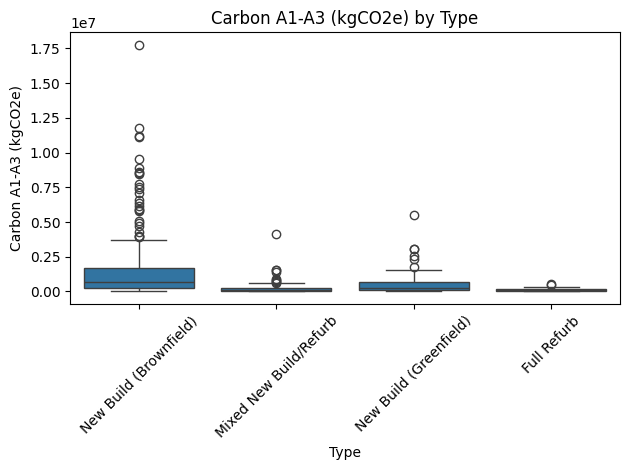

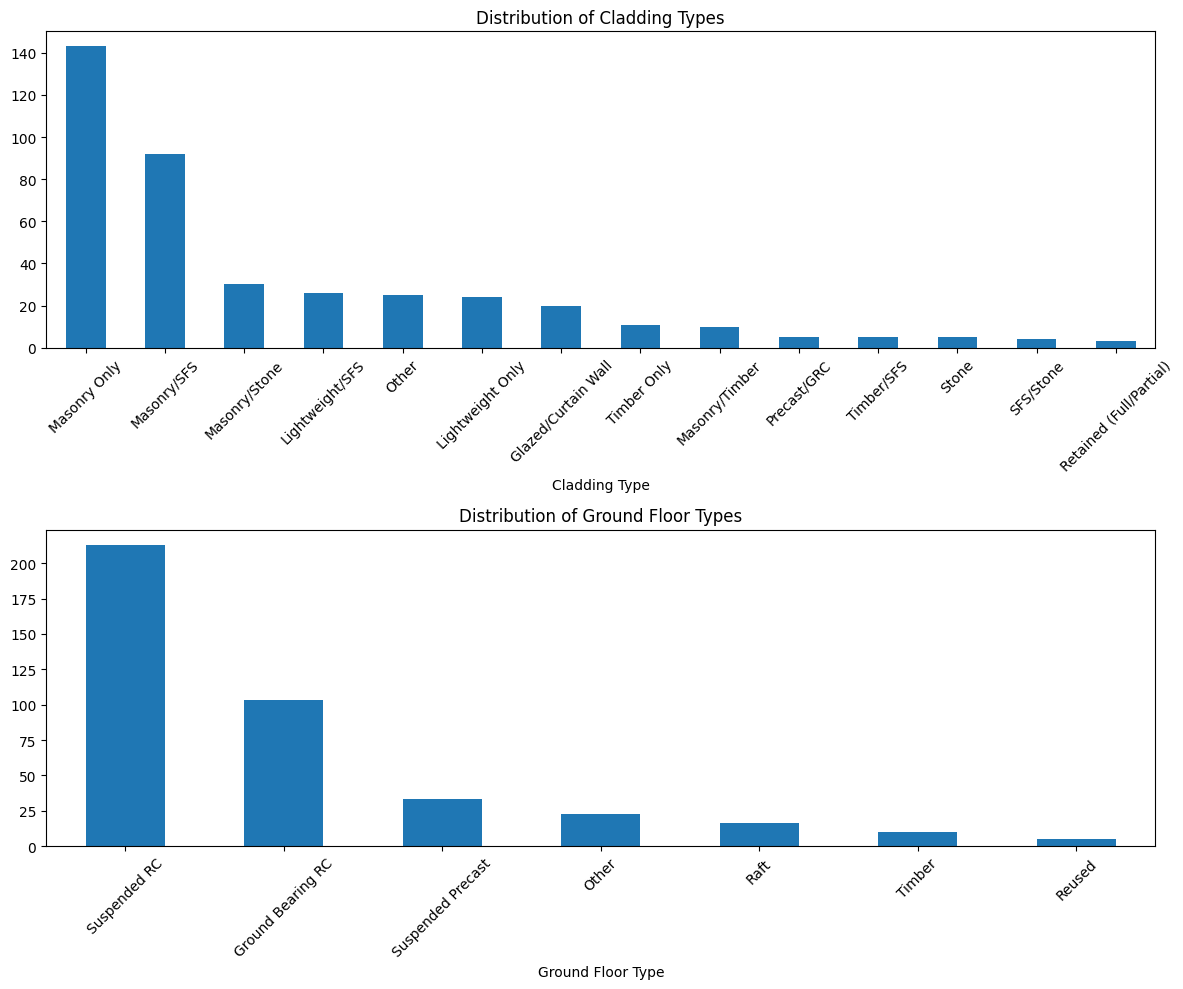

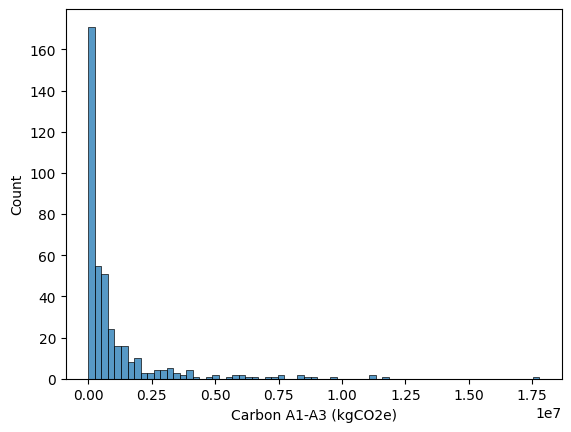

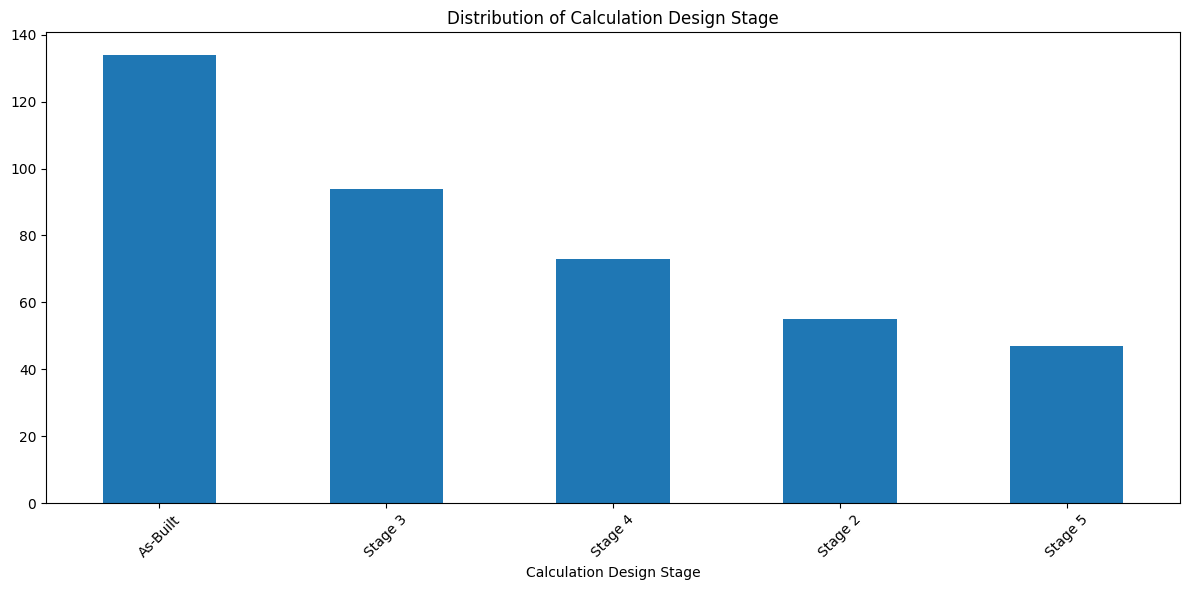

In [10]:
main()

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def prepare_pca_regression(X, num_features, cat_features, target=None):
    """
    Prepare data using PCA for regression while handling both numerical and categorical features.
    
    Parameters:
    - X: DataFrame containing features
    - num_features: list of numerical feature names
    - cat_features: list of categorical feature names
    """
    
    # 1. Create preprocessing pipeline with handle_unknown='ignore' for OneHotEncoder
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', RobustScaler(), num_features),
            ('cat', OneHotEncoder(drop='first', 
 
                                handle_unknown='ignore'), cat_features)
        ])
    
    # First, preprocess the data to get the number of features
    X_preprocessed = preprocessor.fit_transform(X)
    n_features = X_preprocessed.shape[1]
    
    # Calculate the minimum number of components needed to explain 95% variance
    temp_pca = PCA()
    temp_pca.fit(X_preprocessed)
    cumsum = np.cumsum(temp_pca.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= 0.95) + 1
    
    # Now create the final PCA pipeline
    pca_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=min(n_components, n_features)))
    ])
    
    # Print category information before fitting
    print("\nCategory information:")
    for cat_feat in cat_features:
        print(f"\n{cat_feat} categories:")
        print(X[cat_feat].value_counts())
    
    # Fit and transform the data
    X_pca = pca_pipeline.fit_transform(X)
    
    # Get explained variance ratio
    explained_variance = pca_pipeline.named_steps['pca'].explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    n_components_selected = len(explained_variance)
    
    print(f"\nOriginal number of features after preprocessing: {n_features}")
    print(f"Number of components selected: {n_components_selected}")
    print(f"Total variance explained: {cumulative_variance[-1]:.3f}")
    
    # Get feature names after preprocessing
    num_features_names = num_features
    try:
        cat_features_names = (
            pca_pipeline.named_steps['preprocessor']
            .named_transformers_['cat']
            .get_feature_names_out(cat_features)
        )
    except Exception as e:
        print(f"Warning: Could not get categorical feature names: {e}")
        cat_features_names = [f"cat_{i}" for i in range(
            X_preprocessed.shape[1] - len(num_features))]
    
    all_feature_names = list(num_features_names) + list(cat_features_names)
    
    # Create feature importance DataFrame
    components = pca_pipeline.named_steps['pca'].components_
    feature_importance = pd.DataFrame(
        components.T,
        index=all_feature_names,
        columns=[f'PC{i+1}' for i in range(components.shape[0])]
    )
    
    return X_pca, pca_pipeline, feature_importance

def analyze_categories(X, cat_features):
    """
    Analyze categorical variables and their distributions
    """
    print("\nCategorical Variables Analysis:")
    print("-" * 50)
    
    for feature in cat_features:
        print(f"\n{feature}:")
        value_counts = X[feature].value_counts()
        print("\nValue counts:")
        print(value_counts)
        
        print("\nRare categories (less than 5% of data):")
        total = len(X)
        rare = value_counts[value_counts/total < 0.05]
        print(rare)

def handle_rare_categories(X, cat_features, threshold=0.05):
    """
    Replace rare categories with 'Other'
    """
    X_cleaned = X.copy()
    
    for feature in cat_features:
        value_counts = X[feature].value_counts()
        total = len(X)
        rare_categories = value_counts[value_counts/total < threshold].index
        
        if len(rare_categories) > 0:
            print(f"\nReplacing rare categories in {feature}:")
            print(rare_categories)
            X_cleaned[feature] = X_cleaned[feature].replace(
                rare_categories, 'Other')
    
    return X_cleaned

# Usage example:
"""
# First analyze categories
analyze_categories(X, cat_features)

# Handle rare categories if needed
X_cleaned = handle_rare_categories(X, cat_features)

# Then proceed with PCA
X_pca, pca_pipeline, feature_importance = prepare_pca_regression(
    X_cleaned, 
    num_features, 
    cat_features
)
"""

def validate_categories(X_train, X_test, cat_features):
    """
    Validate that all categories in test set exist in training set
    """
    missing_categories = {}
    
    for feature in cat_features:
        test_categories = set(X_test[feature].unique())
        train_categories = set(X_train[feature].unique())
        
        missing = test_categories - train_categories
        if missing:
            missing_categories[feature] = missing
    
    return missing_categories

# Example of full pipeline with validation:
def full_pca_pipeline(X_train, X_test, num_features, cat_features):
    """
    Full pipeline with category validation and handling
    """
    # 1. Analyze categories
    print("Analyzing training data categories:")
    analyze_categories(X_train, cat_features)
    
    # 2. Check for missing categories in test set
    missing_cats = validate_categories(X_train, X_test, cat_features)
    if missing_cats:
        print("\nWarning: Found categories in test set that don't exist in training set:")
        for feat, cats in missing_cats.items():
            print(f"{feat}: {cats}")
    
    # 3. Handle rare categories
    X_train_cleaned = handle_rare_categories(X_train, cat_features)
    X_test_cleaned = handle_rare_categories(X_test, cat_features)
    
    # 4. Perform PCA
    X_train_pca, pca_pipeline, feature_importance = prepare_pca_regression(
        X_train_cleaned, 
        num_features, 
        cat_features
    )
    
    # 5. Transform test data
    X_test_pca = pca_pipeline.transform(X_test_cleaned)
    
    return X_train_pca, X_test_pca, pca_pipeline, feature_importance

def plot_pca_analysis(X_pca, pca_pipeline, feature_importance):
    """
    Create visualizations for PCA analysis
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Plot explained variance ratio
    plt.figure(figsize=(10, 5))
    explained_variance = pca_pipeline.named_steps['pca'].explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    plt.plot(range(1, len(explained_variance) + 1), 
            cumulative_variance, 
            'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance vs Number of Components')
    plt.grid(True)
    plt.show()
    
    # Plot first two principal components
    if X_pca.shape[1] >= 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('First Two Principal Components')
        plt.show()
    
    # Heatmap of feature importance
    plt.figure(figsize=(12, 8))
    sns.heatmap(feature_importance, cmap='RdBu', center=0)
    plt.title('Feature Importance in Principal Components')
    plt.tight_layout()
    plt.show()

In [13]:
X, y = df[cat_features+num_features] , df[target]
# X_train_pca, X_test_pca, pca_pipeline, feature_importance=  regression_with_pca(X, y, num_features, cat_features)
# plot_explained_variance(pca_pipeline)


Training Set Predictions:


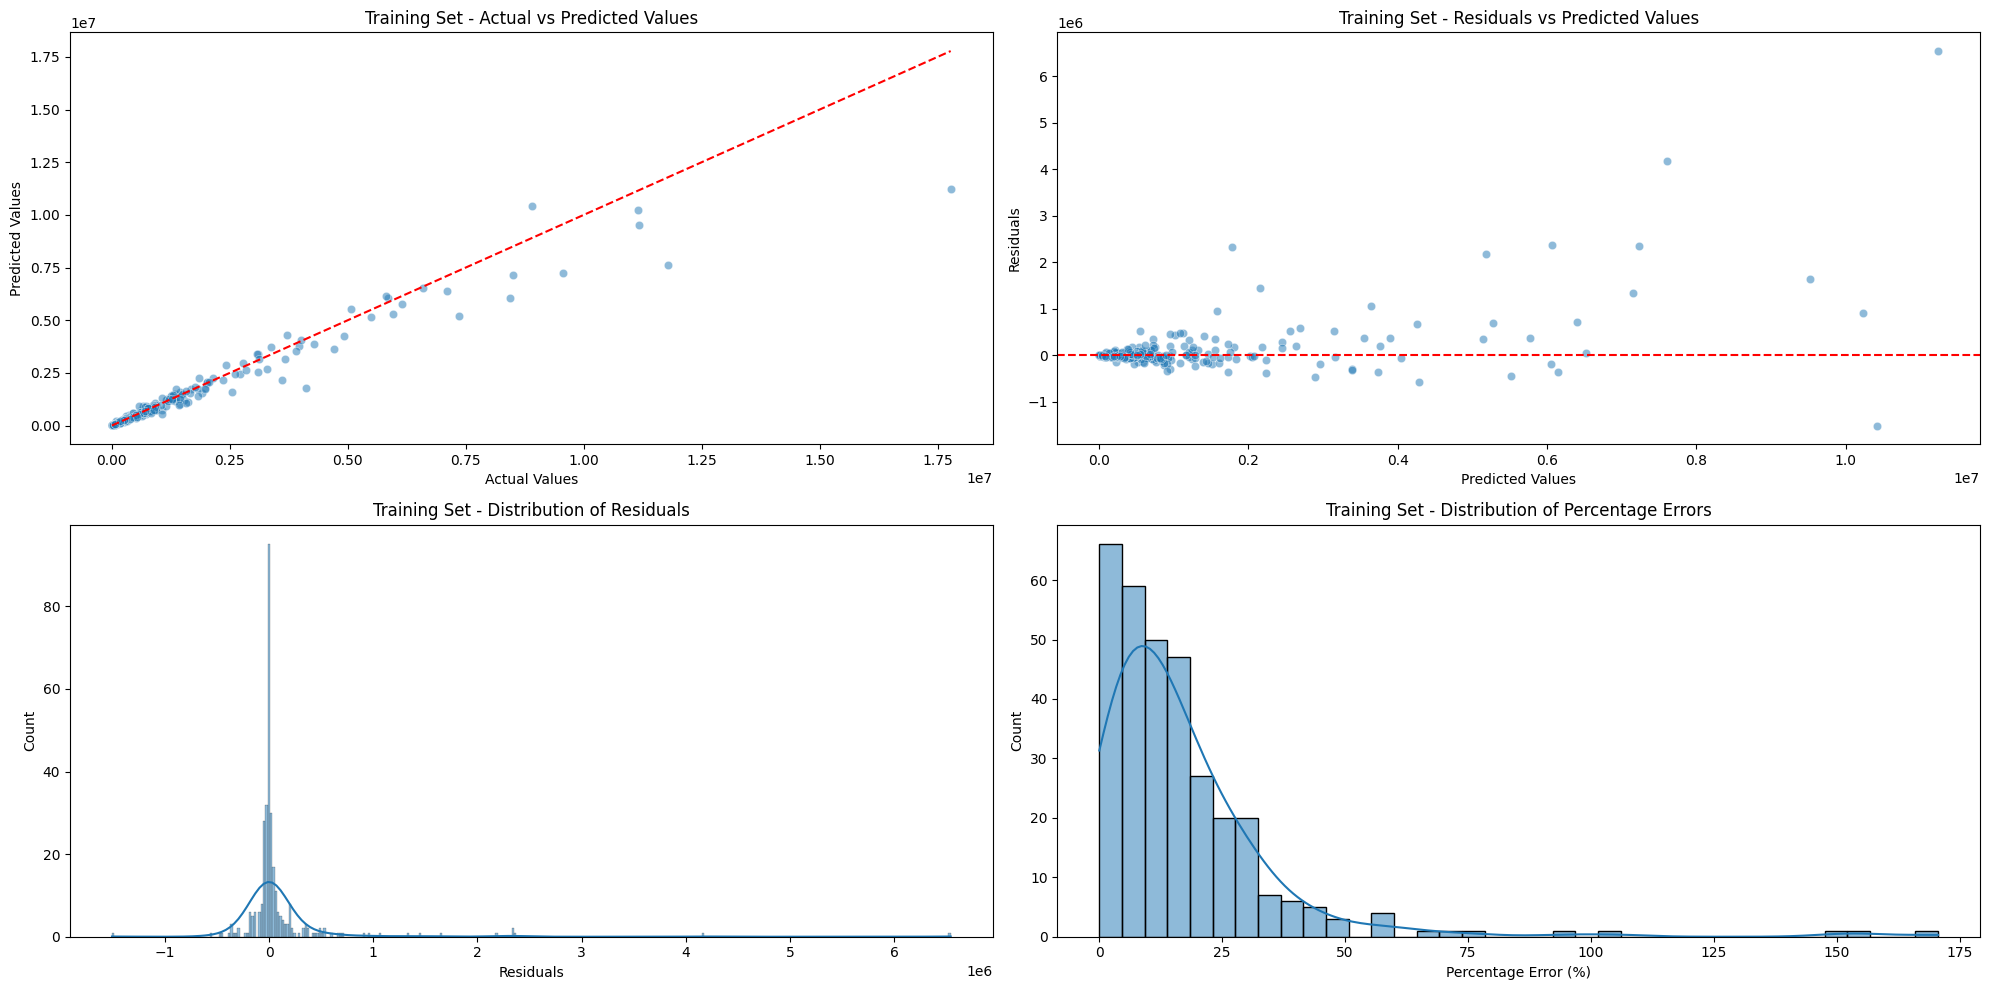


Training Set - Prediction Analysis Summary:
--------------------------------------------------
Mean Absolute Percentage Error: 17.02%
Median Absolute Percentage Error: 11.99%
90th Percentile of Absolute Percentage Error: 32.37%
Percentage of predictions within 10% error: 42.5%
Percentage of predictions within 20% error: 72.7%

Test Set Predictions:


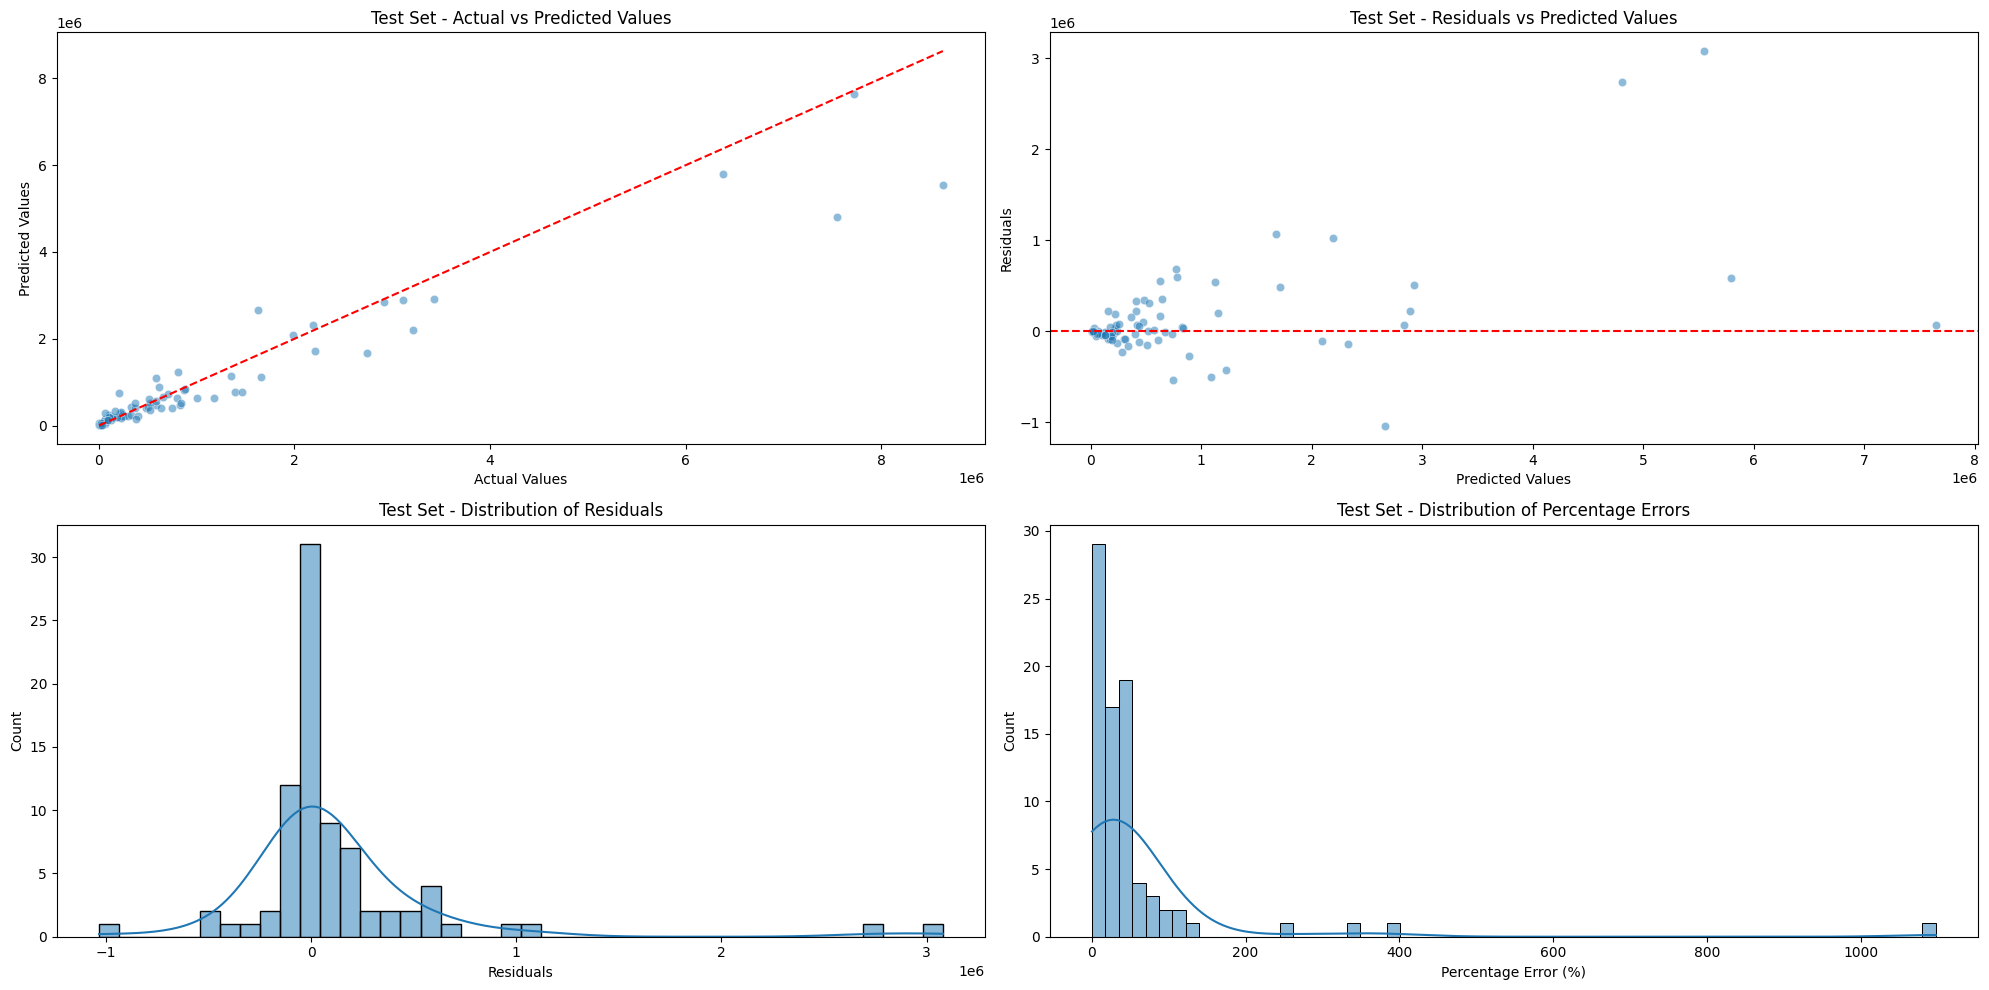


Test Set - Prediction Analysis Summary:
--------------------------------------------------
Mean Absolute Percentage Error: 56.69%
Median Absolute Percentage Error: 31.77%
90th Percentile of Absolute Percentage Error: 92.98%
Percentage of predictions within 10% error: 28.4%
Percentage of predictions within 20% error: 38.3%

Cross-Validation Results:
--------------------------------------------------

Average CV Metrics:
Average train_rmse: 578844.592
Average val_rmse: 866469.074
Average train_r2: 0.922
Average val_r2: 0.813
Average train_mae: 176373.408
Average val_mae: 329305.181

Test Set Performance:
--------------------------------------------------
mae: 248959.756
rmse: 547882.631
r2: 0.897

Top 15 Most Important Features (Average across folds):
feature
GIFA per Storey             0.397263
Superstructure Type         0.213551
Storeys (#)                 0.127987
Foundation Type             0.063802
Basement?                   0.044579
Fire Rating                 0.040638
Ground Fl

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns

def create_target_bins(y, n_bins=10):
    """Create bins for target variable stratification"""
    kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    return kbd.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

def visualize_predictions(y_true, y_pred, title_prefix=""):
    """
    Create visualizations for model predictions including:
    1. Actual vs Predicted scatter plot
    2. Residuals plot
    3. Residuals distribution
    4. Error percentage distribution
    """
    # Convert to 1D numpy arrays
    y_true = np.exp(np.ravel(y_true))
    y_pred = np.exp(np.ravel(y_pred))
    
    # Create DataFrame for seaborn plotting
    plot_df = pd.DataFrame({
        'Actual': y_true,
        'Predicted': y_pred
    })
    
    # Calculate residuals and percentage errors
    residuals = y_true - y_pred
    percentage_error = np.abs((y_true - y_pred) / y_true) * 100
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 10))
    
    # 1. Actual vs Predicted
    ax1 = plt.subplot(221)
    sns.scatterplot(data=plot_df, x='Actual', y='Predicted', alpha=0.5)
    max_val = max(y_true.max(), y_pred.max())
    min_val = min(y_true.min(), y_pred.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title_prefix}Actual vs Predicted Values')
    
    # 2. Residuals Plot
    ax2 = plt.subplot(222)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title_prefix}Residuals vs Predicted Values')
    
    # 3. Residuals Distribution
    ax3 = plt.subplot(223)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.title(f'{title_prefix}Distribution of Residuals')
    
    # 4. Percentage Error Distribution
    ax4 = plt.subplot(224)
    sns.histplot(percentage_error, kde=True)
    plt.xlabel('Percentage Error (%)')
    plt.ylabel('Count')
    plt.title(f'{title_prefix}Distribution of Percentage Errors')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{title_prefix}Prediction Analysis Summary:")
    print("-" * 50)
    print(f"Mean Absolute Percentage Error: {np.mean(percentage_error):.2f}%")
    print(f"Median Absolute Percentage Error: {np.median(percentage_error):.2f}%")
    print(f"90th Percentile of Absolute Percentage Error: {np.percentile(percentage_error, 90):.2f}%")
    print(f"Percentage of predictions within 10% error: {(percentage_error <= 10).mean() * 100:.1f}%")
    print(f"Percentage of predictions within 20% error: {(percentage_error <= 20).mean() * 100:.1f}%")

def prepare_features(X, cat_features, num_features):
    """Prepare features by normalizing numerical features and encoding categorical features"""
    X_processed = X.copy()
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Normalize numerical features
    X_processed[num_features] = scaler.fit_transform(X_processed[num_features])
    
    # Convert categorical features to category dtype
    for col in cat_features:
        if col in X_processed.columns:
            X_processed[col] = X_processed[col].astype('category')
    
    return X_processed, scaler
def calculate_true_metrics(y_true_log, y_pred_log):
    """Calculate metrics in the original scale after converting from log scale"""
    # Convert to numpy arrays and ensure 1D
    y_true_log = np.ravel(y_true_log)
    y_pred_log = np.ravel(y_pred_log)
    
    # Convert from log scale to original scale
    y_true = np.exp(y_true_log)
    y_pred = np.exp(y_pred_log)
    
    # Calculate metrics
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    r2 = r2_score(y_true, y_pred)
    
    return {
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
def train_evaluate_xgboost(X, y, cat_features, num_features, test_size=0.2, n_splits=5):
    """Train and evaluate XGBoost model with train/test split and cross-validation"""
    # First, create a train/test split
    y_bins = create_target_bins(y)
    X_train, X_test, y_train, y_test, y_bins_train, y_bins_test = train_test_split(
        X, y, y_bins, test_size=test_size, random_state=42, stratify=y_bins
    )
    
    # Prepare features using only training data
    X_train_processed, scaler = prepare_features(X_train, cat_features, num_features)
    
    # Transform test set using training set's scaler
    X_test_processed = X_test.copy()
    X_test_processed[num_features] = scaler.transform(X_test[num_features])
    for col in cat_features:
        if col in X_test_processed.columns:
            X_test_processed[col] = X_test_processed[col].astype('category')
    
    # Initialize StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Initialize metrics storage
    fold_metrics = []
    feature_importance_df = pd.DataFrame()
    
    # Model parameters
    model_params = {
        'n_estimators': 500,
        'learning_rate': 0.01,
        'max_depth': 6,
        'min_child_weight': 3,
        'gamma': 0.1,
        'subsample': 0.6,
        'reg_alpha': 0.2,
        'reg_lambda': 1.0,
        'random_state': 42,
        'enable_categorical': True
    }
    
    # Perform cross-validation on training data
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_processed, y_bins_train), 1):
        X_fold_train, X_fold_val = X_train_processed.iloc[train_idx], X_train_processed.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = xgb.XGBRegressor(**model_params)
        model.fit(X_fold_train, y_fold_train)
        
        y_pred_fold_train = model.predict(X_fold_train)
        y_pred_fold_val = model.predict(X_fold_val)
        
        # Calculate metrics in original scale
        train_metrics = calculate_true_metrics(y_fold_train, y_pred_fold_train)
        val_metrics = calculate_true_metrics(y_fold_val, y_pred_fold_val)
        
        fold_metrics.append({
            'fold': fold,
            'train_rmse': train_metrics['rmse'],
            'val_rmse': val_metrics['rmse'],
            'train_r2': train_metrics['r2'],
            'val_r2': val_metrics['r2'],
            'train_mae': train_metrics['mae'],
            'val_mae': val_metrics['mae']
        })
        
        importance_df = pd.DataFrame({
            'feature': X_train_processed.columns,
            'importance': model.feature_importances_
        })
        importance_df['fold'] = fold
        feature_importance_df = pd.concat([feature_importance_df, importance_df])
    
    # Train final model on entire training set
    final_model = xgb.XGBRegressor(**model_params)
    final_model.fit(X_train_processed, y_train)
    
    # Make predictions
    y_pred_train = final_model.predict(X_train_processed)
    y_pred_test = final_model.predict(X_test_processed)
    
    # Calculate test metrics in original scale
    test_metrics = calculate_true_metrics(y_test, y_pred_test)
    
    # Visualize predictions
    print("\nTraining Set Predictions:")
    visualize_predictions(y_train, y_pred_train, "Training Set - ")
    
    print("\nTest Set Predictions:")
    visualize_predictions(y_test, y_pred_test, "Test Set - ")
    
    return (pd.DataFrame(fold_metrics), feature_importance_df, final_model, 
            scaler, test_metrics, X_test, y_test, y_pred_train, y_pred_test)

(metrics_df, feature_importance_df, final_model, scaler, test_metrics, 
 X_test, y_test, y_pred_train, y_pred_test) = train_evaluate_xgboost(
    X, y, cat_features, num_features, test_size=0.2
)

# Print results
print("\nCross-Validation Results:")
print("-" * 50)
print("\nAverage CV Metrics:")
mean_metrics = metrics_df.mean()
for metric in ['train_rmse', 'val_rmse', 'train_r2', 'val_r2', 'train_mae', 'val_mae']:
    print(f"Average {metric}: {mean_metrics[metric]:.3f}")

print("\nTest Set Performance:")
print("-" * 50)
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.3f}")

# Print top features
print("\nTop 15 Most Important Features (Average across folds):")
feature_importance_summary = (feature_importance_df.groupby('feature')['importance']
                            .mean()
                            .sort_values(ascending=False)
                            .head(15))
print(feature_importance_summary)
